In [1]:
import pandas as pd
from minepy import MINE
from joblib  import Parallel,delayed
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mic(x,y):
    '''输入为dataframe'''
    if type(x) == pd.DataFrame:
        x = x.prob.values.ravel()
        y = y.prob.values.ravel()
    m = MINE(est ='mic_e')
    m.compute_score(x,y)
    return m.mic()

def cal_raw(x,pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(mic)(x,y) for y in pred_list)
    return result

def cal_matrix(pred_list):
    result = Parallel(n_jobs=len(pred_list),verbose=10)(delayed(cal_raw)(x,pred_list) for x in pred_list)
    return np.array(result)

def plot_mic_matrix(mic_matrix,ticks):
    plt.figure(figsize=(16,16))
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.heatmap(mic_matrix,linewidths=1,vmax=1.0,
            square=True,linecolor='white',annot=True,xticklabels=ticks,yticklabels =ticks)

In [ ]:
file_names = [file for file in os.listdir('./preds_for_bagging/') if file[0]!='.']

pred_list = []
for file in file_names:
    pred = pd.read_csv(os.path.join('./preds_for_bagging/',file))
    pred_list.append(pred)
mic_matrix = cal_matrix(pred_list)

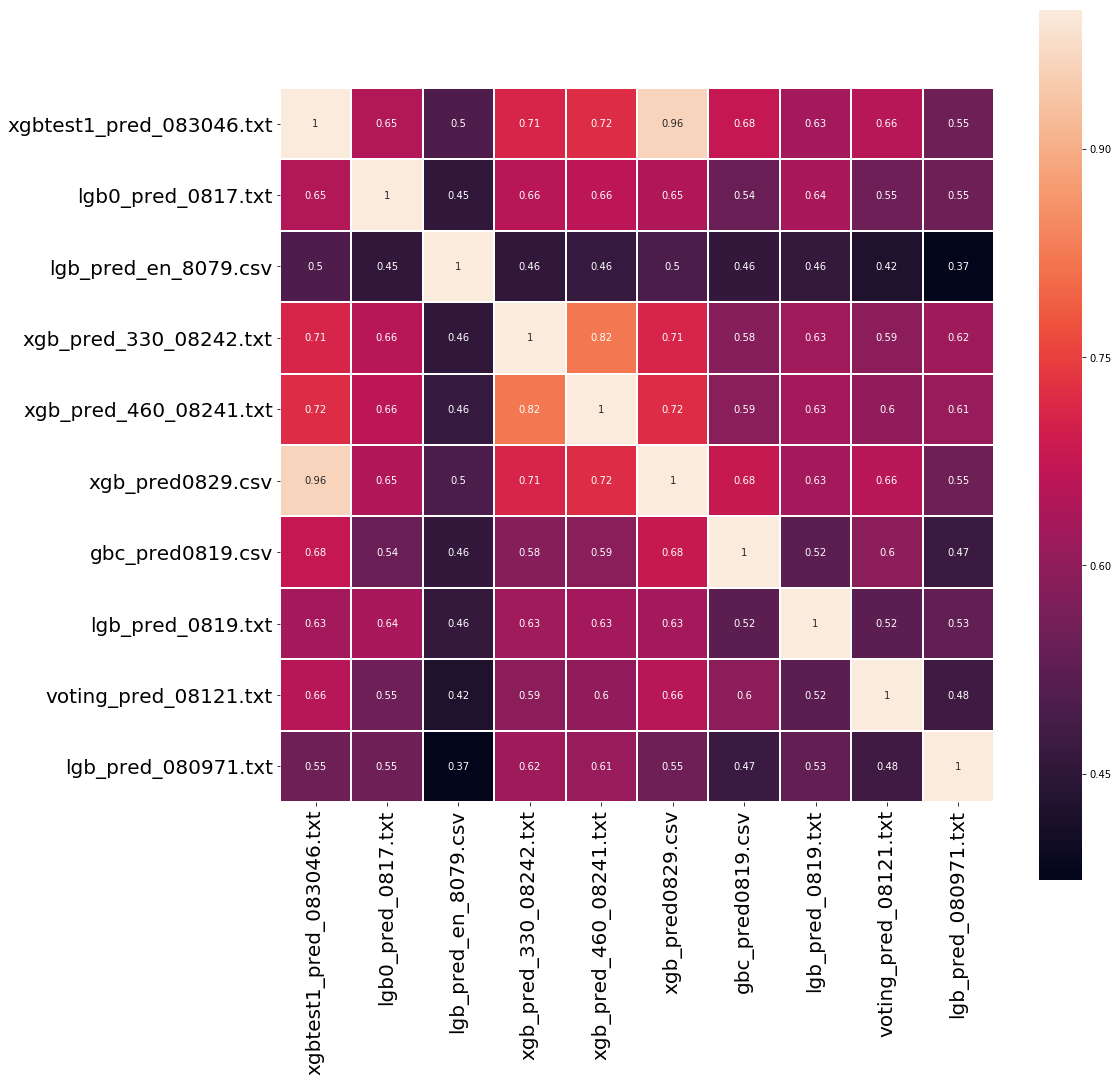

In [4]:
plot_mic_matrix(mic_matrix,file_names)